# Census income classification assessment

In [20]:
#importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold 
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import data

In [2]:
df_train = pd.read_csv('census_income_learn.csv') #Read the dataset
df_test=pd.read_csv('census_income_test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(199522, 42)
(99761, 42)


In [3]:
df_train.columns=['age','class of worker','industry code','occupation code','education','wage per hour',
            'enrolled in edu inst last wk','marital status','major industry code','major occupation code',
            'race','hispanic Origin','sex','member of a labor union','reason for unemployment',
            'full or part time employment stat','capital gains','capital losses','divdends from stocks','tax filer status',
            'region of previous residence','state of previous residence','detailed household and family stat',
            'detailed household summary in household','instance weight','migration code-change in msa',
            'migration code-change in reg','migration code-move within reg','live in this house 1 year ago',
            'migration prev res in sunbelt','num persons worked for employer','family members under 18',
            'country of birth father','country of birth mother','country of birth self','citizenship',
            'own business or self employed','fill inc questionnaire for veterans admin','veterans benefits',
            'weeks worked in year','year','total person income']

In [5]:
df_train

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,total person income
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199517,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199518,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199519,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199520,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [4]:
df_test.columns=['age','class of worker','industry code','occupation code','education','wage per hour',
                 'enrolled in edu inst last wk','marital status','major industry code','major occupation code',
                 'race','hispanic Origin','sex','member of a labor union','reason for unemployment',
                 'full or part time employment stat','capital gains','capital losses','divdends from stocks','tax filer status',
                 'region of previous residence','state of previous residence','detailed household and family stat',
                 'detailed household summary in household','instance weight','migration code-change in msa',
                 'migration code-change in reg','migration code-move within reg','live in this house 1 year ago',
                 'migration prev res in sunbelt','num persons worked for employer','family members under 18',
                 'country of birth father','country of birth mother','country of birth self','citizenship',
                 'own business or self employed','fill inc questionnaire for veterans admin','veterans benefits',
                 'weeks worked in year','year','total person income']


In [7]:
df_test

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,total person income
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99756,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
99757,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
99758,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,- 50000.
99759,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


# Exploratory data analysis

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199522 non-null  int64  
 1   class of worker                            199522 non-null  object 
 2   industry code                              199522 non-null  int64  
 3   occupation code                            199522 non-null  int64  
 4   education                                  199522 non-null  object 
 5   wage per hour                              199522 non-null  int64  
 6   enrolled in edu inst last wk               199522 non-null  object 
 7   marital status                             199522 non-null  object 
 8   major industry code                        199522 non-null  object 
 9   major occupation code                      199522 non-null  object 
 10  race    

In [9]:
df_train.describe(include="all")           #statistical description of the data

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,total person income
count,199522.000000,199522,199522.000000,199522.000000,199522,199522.000000,199522,199522,199522,199522,...,199522,199522,199522,199522,199522.000000,199522,199522.000000,199522.000000,199522.000000,199522
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,...,43,43,43,5,NaN,3,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.
freq,NaN,100244,NaN,NaN,48406,NaN,186942,86485,100683,100683,...,159162,160478,176988,176991,NaN,197538,NaN,NaN,NaN,187140
mean,34.494006,NaN,15.352397,11.306613,NaN,55.427186,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.175439,NaN,1.514830,23.175013,94.499669,NaN
std,22.310785,NaN,18.067141,14.454218,NaN,274.897115,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.553696,NaN,0.851475,24.411494,0.500001,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,NaN
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,NaN


In [10]:
df_train.dtypes                   #data types of all attributes

age                                            int64
class of worker                               object
industry code                                  int64
occupation code                                int64
education                                     object
wage per hour                                  int64
enrolled in edu inst last wk                  object
marital status                                object
major industry code                           object
major occupation code                         object
race                                          object
hispanic Origin                               object
sex                                           object
member of a labor union                       object
reason for unemployment                       object
full or part time employment stat             object
capital gains                                  int64
capital losses                                 int64
divdends from stocks                          

### Detecting and dropping duplicates

In [11]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

3229
883


In [12]:
df_train.drop_duplicates(keep='first', inplace=True)   #dropping duplicate rows from the data
df_test.drop_duplicates(keep='first', inplace=True)  

In [13]:
print(df_train.shape)
print(df_test.shape)

(196293, 42)
(98878, 42)


### Detecting null values

In [14]:
df_train.isnull().sum()

age                                          0
class of worker                              0
industry code                                0
occupation code                              0
education                                    0
wage per hour                                0
enrolled in edu inst last wk                 0
marital status                               0
major industry code                          0
major occupation code                        0
race                                         0
hispanic Origin                              0
sex                                          0
member of a labor union                      0
reason for unemployment                      0
full or part time employment stat            0
capital gains                                0
capital losses                               0
divdends from stocks                         0
tax filer status                             0
region of previous residence                 0
state of prev

In [15]:
df_test.isnull().sum()

age                                          0
class of worker                              0
industry code                                0
occupation code                              0
education                                    0
wage per hour                                0
enrolled in edu inst last wk                 0
marital status                               0
major industry code                          0
major occupation code                        0
race                                         0
hispanic Origin                              0
sex                                          0
member of a labor union                      0
reason for unemployment                      0
full or part time employment stat            0
capital gains                                0
capital losses                               0
divdends from stocks                         0
tax filer status                             0
region of previous residence                 0
state of prev

In [5]:
# dropping columns that can cause imbalance
lists=["enrolled in edu inst last wk","major occupation code","member of a labor union","reason for unemployment","region of previous residence","migration code-change in msa","migration code-change in reg","migration code-move within reg","live in this house 1 year ago","family members under 18","fill inc questionnaire for veterans admin"]
df_train.drop(columns = lists, inplace=True)

In [6]:
# dropping columns that can cause imbalance
lists=["enrolled in edu inst last wk","major occupation code","member of a labor union","reason for unemployment","region of previous residence","migration code-change in msa","migration code-change in reg","migration code-move within reg","live in this house 1 year ago","family members under 18","fill inc questionnaire for veterans admin"]
df_test.drop(columns = lists, inplace=True)

# Data visualization

Class 0: 183911
Class 1: 12382
Proportion: 14.85 : 1


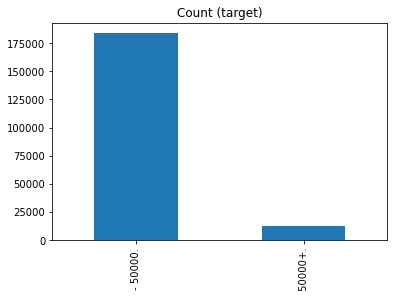

In [18]:
target_count = df_train['total person income'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Class 0: 92692
Class 1: 6186
Proportion: 14.98 : 1


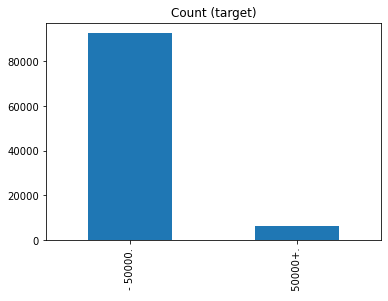

In [19]:
target_count = df_test['total person income'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### The data is highly imbalanced

## Numerical data analysis 

### Total person income by marital status

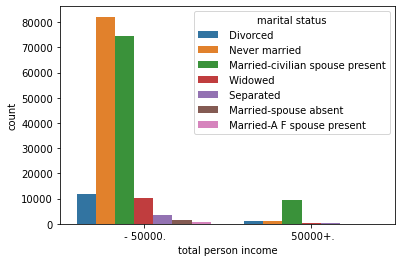

In [20]:
sns.countplot(x='total person income', hue='marital status', data=df_train)

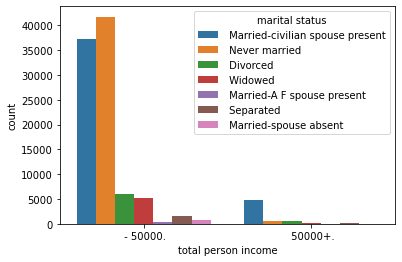

In [21]:
sns.countplot(x='total person income', hue='marital status', data=df_test)

### Total person income by gender

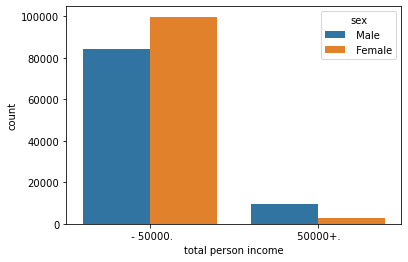

In [22]:
sns.countplot(x='total person income', hue='sex', data=df_train)

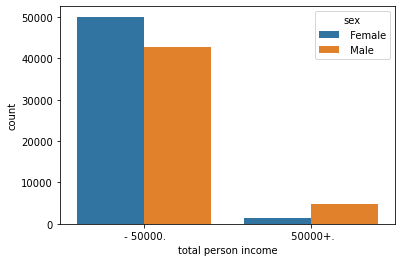

In [23]:
sns.countplot(x='total person income', hue='sex', data=df_test)

### Total person income by wage per hour

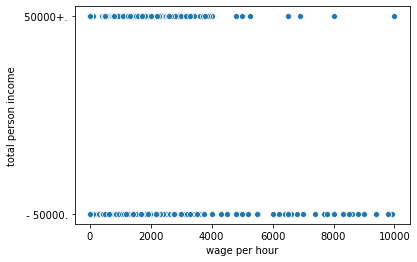

In [25]:
sns.scatterplot(x=df_train['wage per hour'], y=df_train['total person income'])
plt.show()

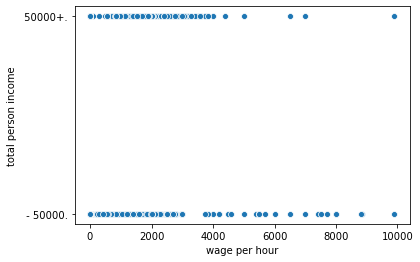

In [26]:
sns.scatterplot(x=df_test['wage per hour'], y=df_test['total person income'])
plt.show()

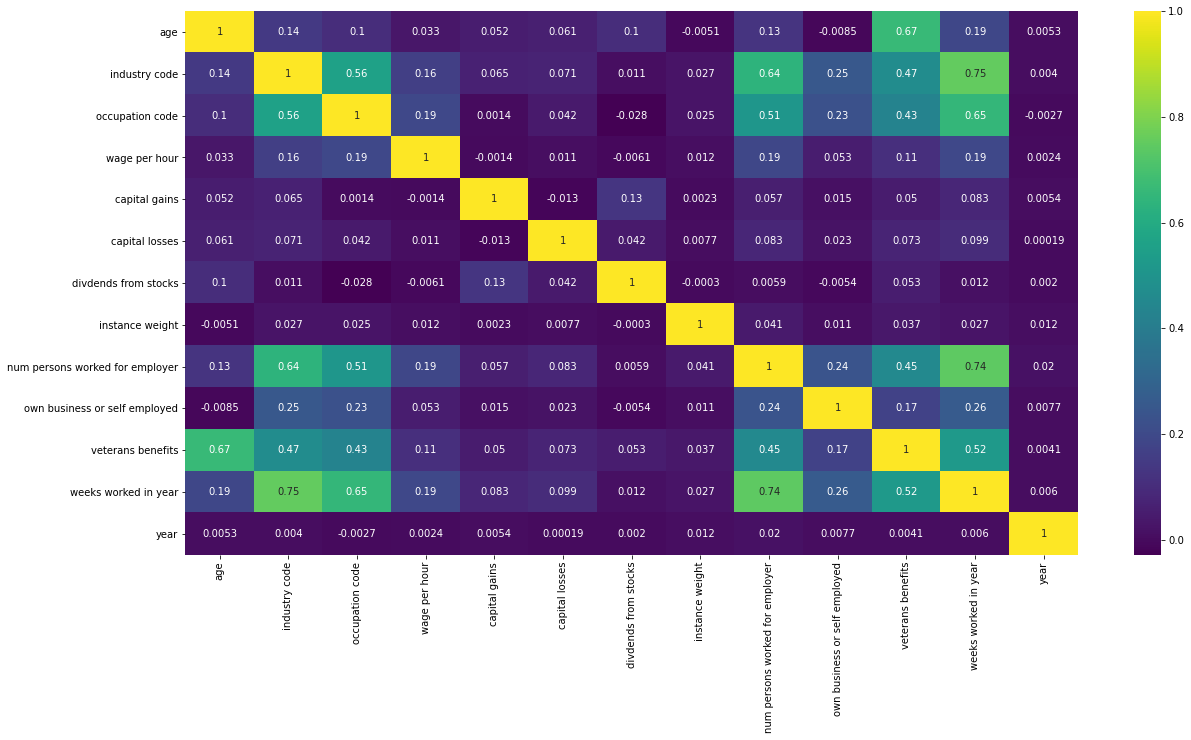

In [28]:
plt.figure(figsize=[20,10])
sns.heatmap(df_train.corr(), annot = True, cmap = 'viridis')

### Education

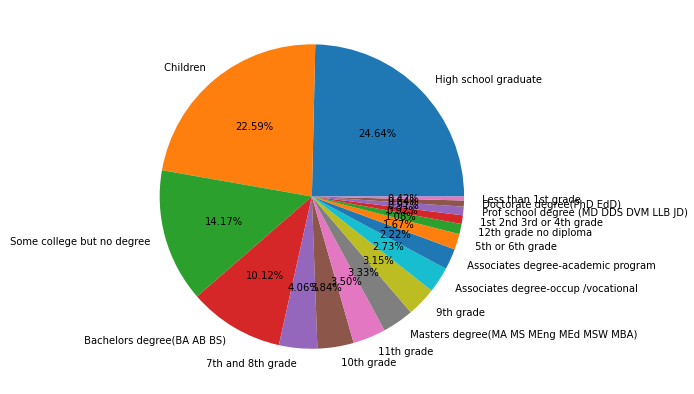

In [29]:
plt.figure(figsize=(10,7))
plt.pie(x=df_train['education'].value_counts().values,
        labels=df_train['education'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

### Total person income based on race

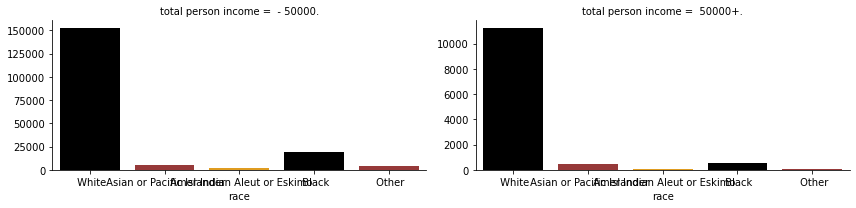

In [30]:
# creating a facet grid with columns as -50,000 and +50,000
grid = sns.FacetGrid(data=df_train, col='total person income', height=3, aspect=2, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'race', palette=['black', 'brown', 'orange'])
plt.show()

### Total person income based on Own business or self employed 

<Figure size 1800x1800 with 0 Axes>

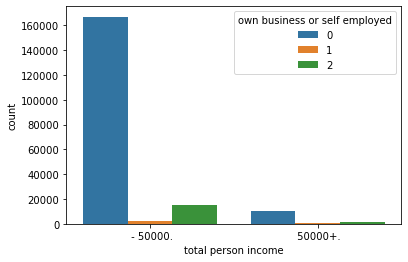

<Figure size 1800x1800 with 0 Axes>

In [31]:
sns.countplot(x='total person income',hue='own business or self employed',data=df_train)
plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

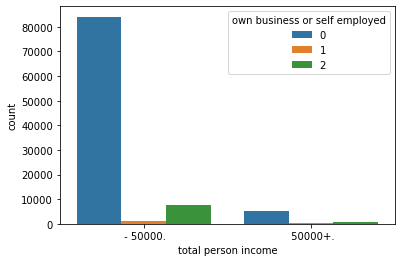

<Figure size 1800x1800 with 0 Axes>

In [32]:
sns.countplot(x='total person income',hue='own business or self employed',data=df_test)
plt.figure(figsize=(25,25))

### Feature engineering

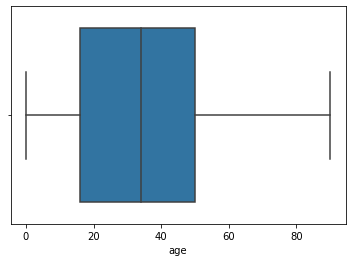

In [33]:
sns.boxplot(x = df_train['age'])

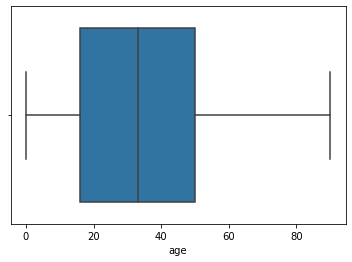

In [34]:
sns.boxplot(x = df_test['age'])

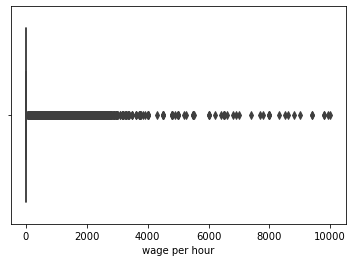

In [35]:
sns.boxplot(x = df_train['wage per hour'])

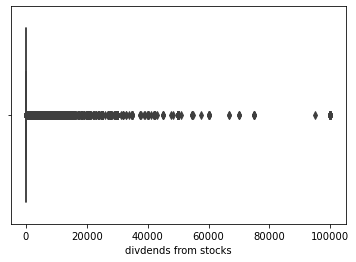

In [36]:
sns.boxplot(x = df_train['divdends from stocks'])

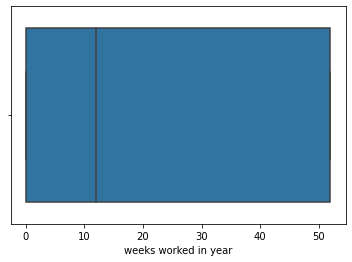

In [37]:
sns.boxplot(x = df_train['weeks worked in year'])

#### As we can see, there are no outliers in the data

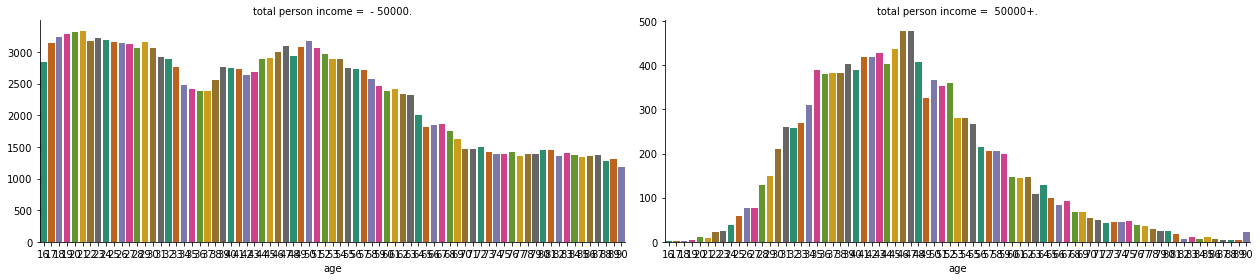

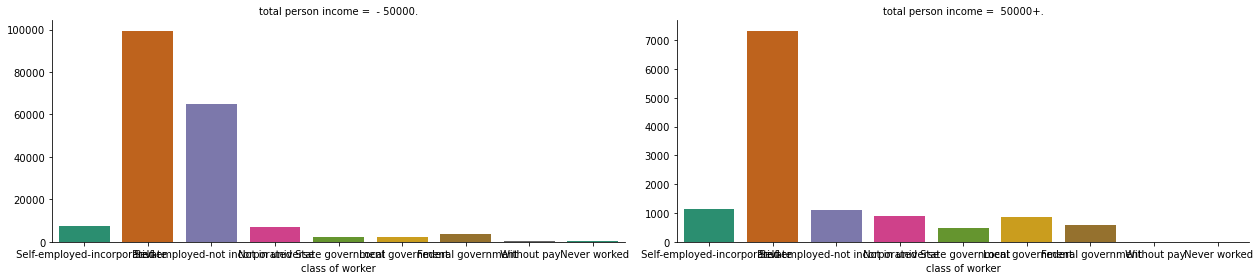

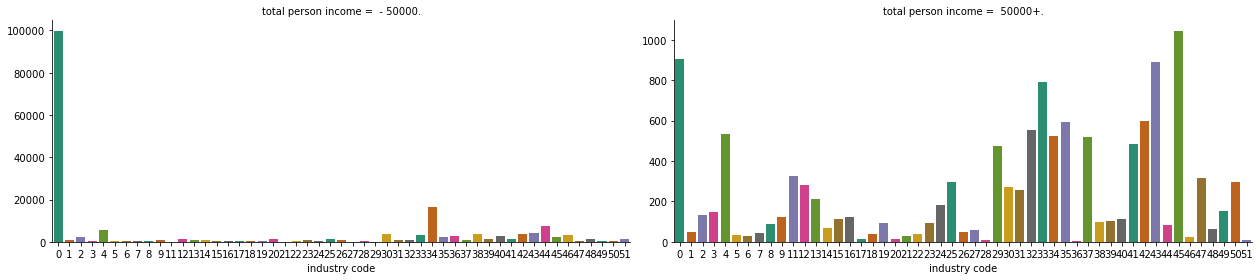

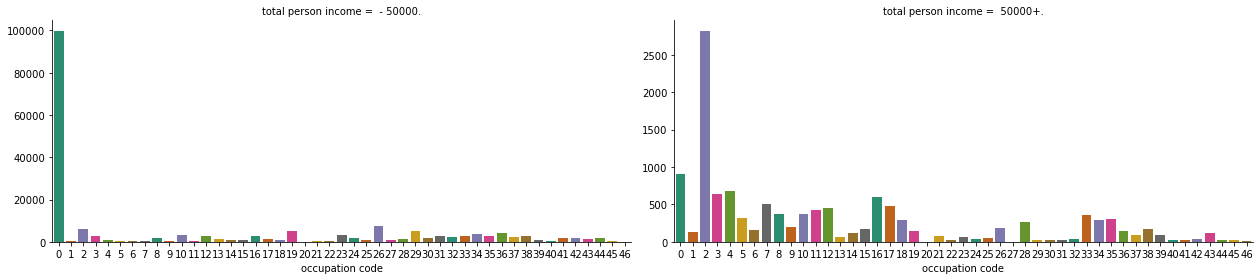

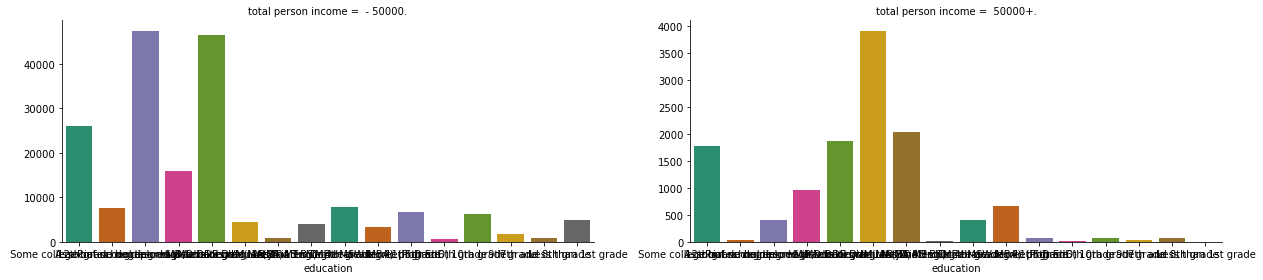

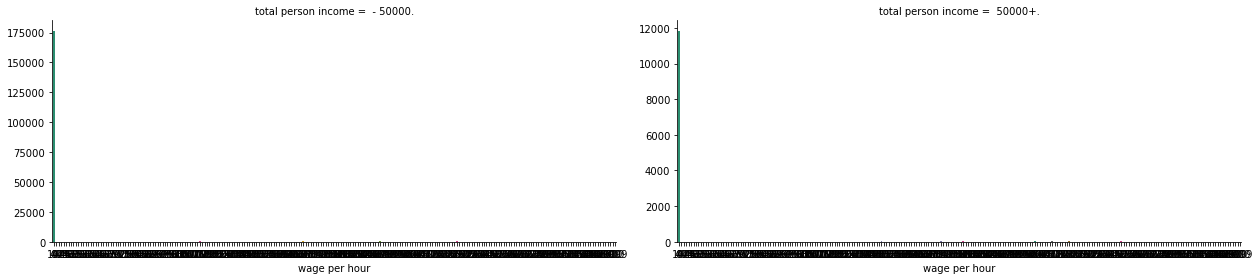

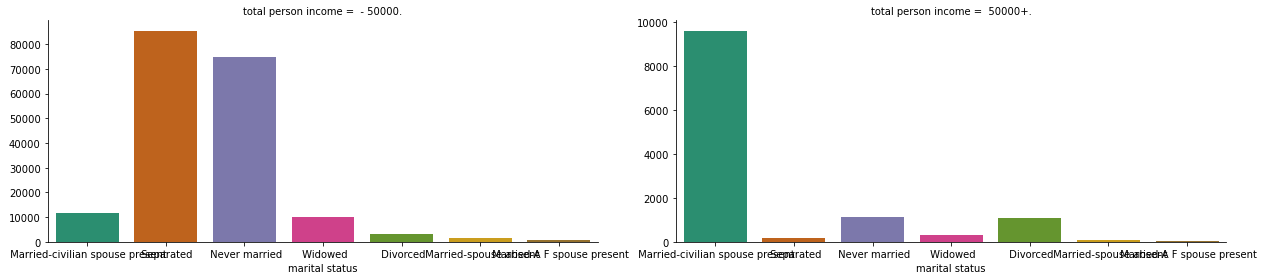

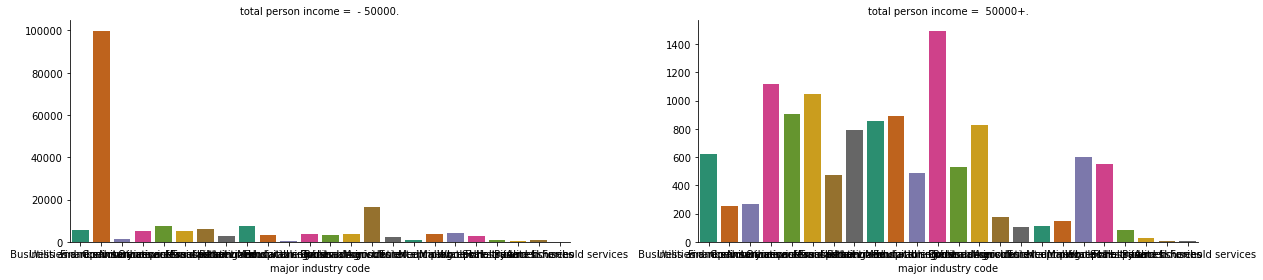

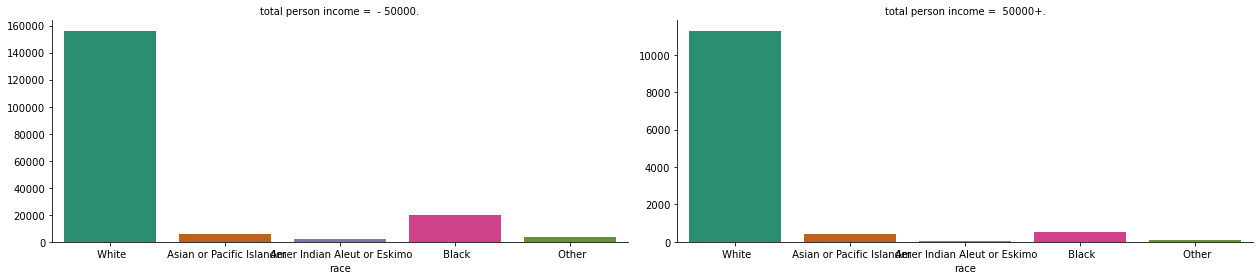

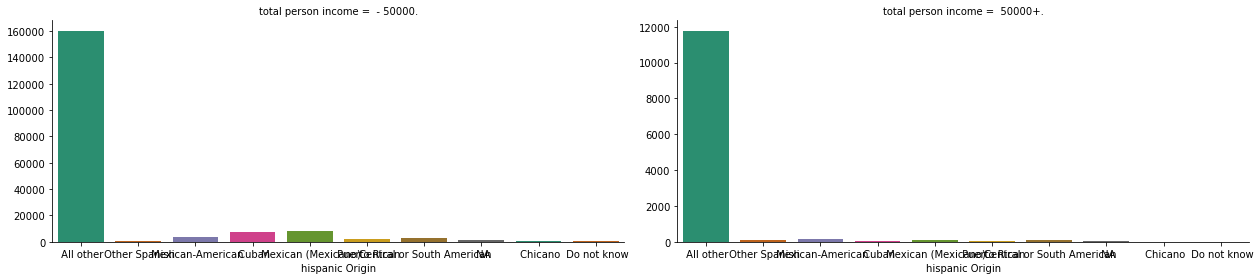

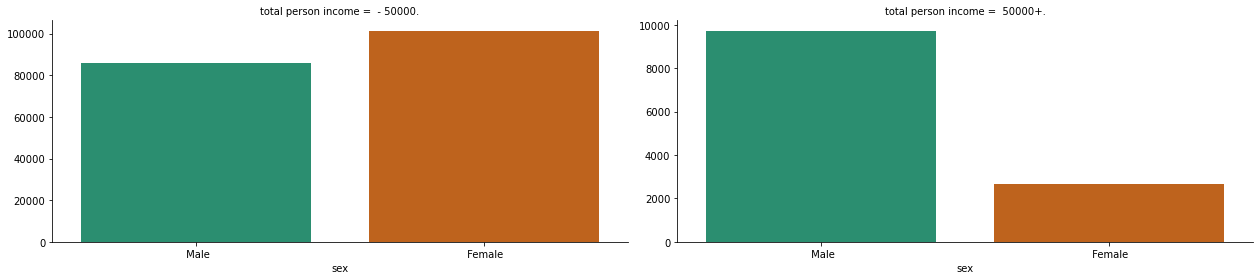

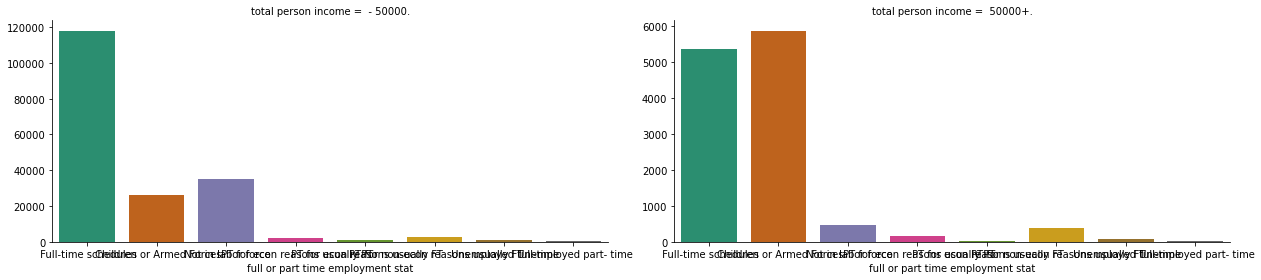

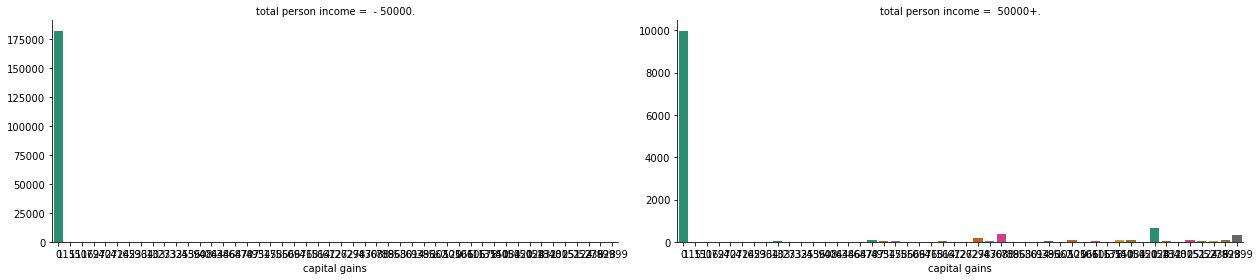

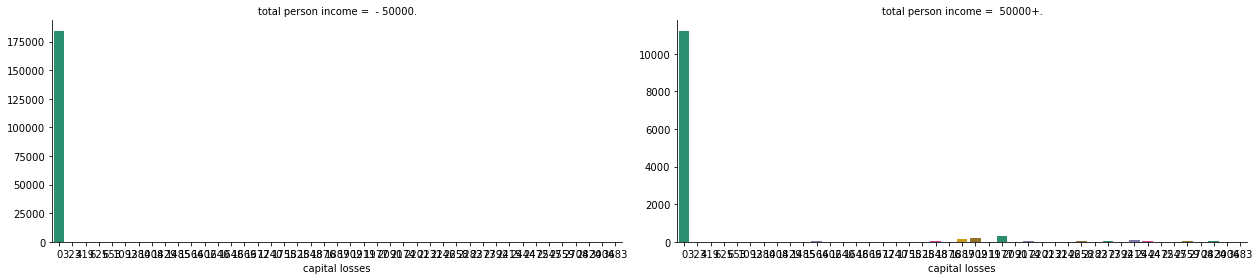

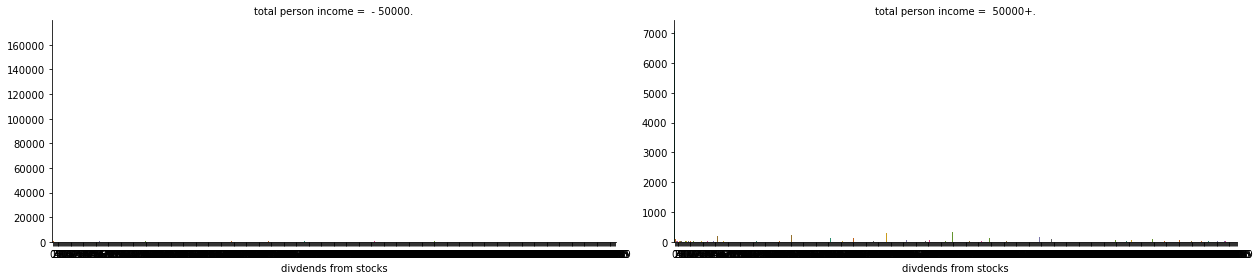

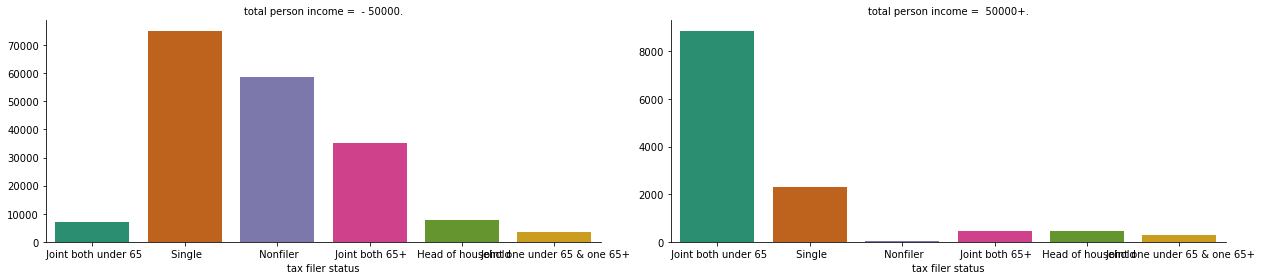

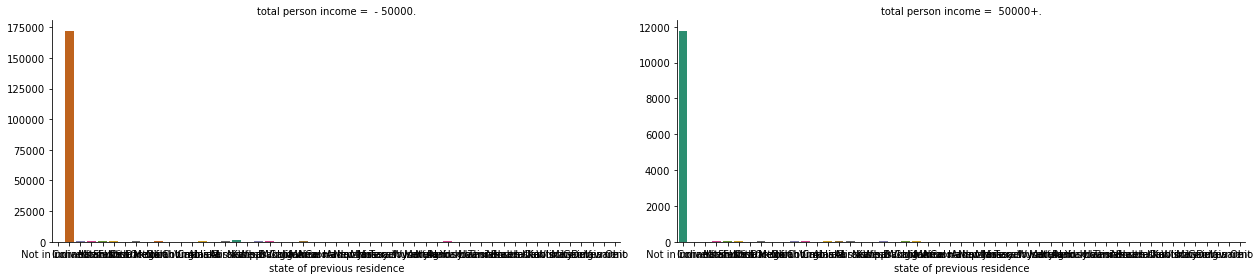

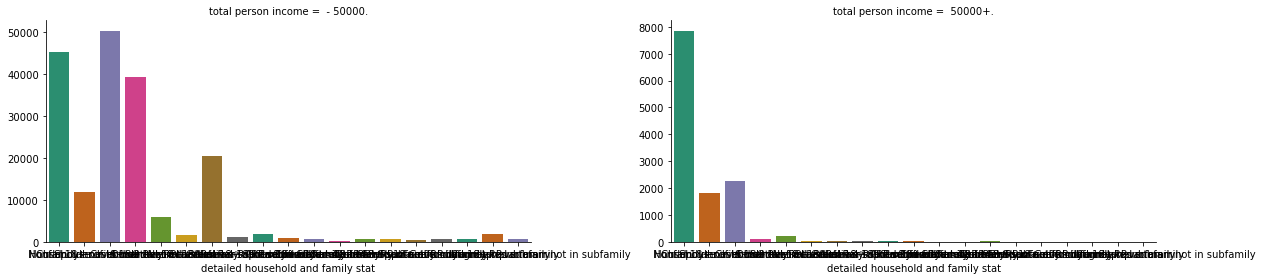

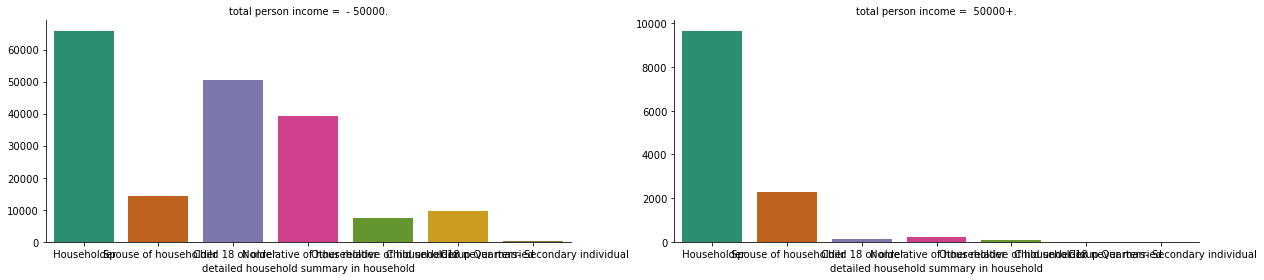

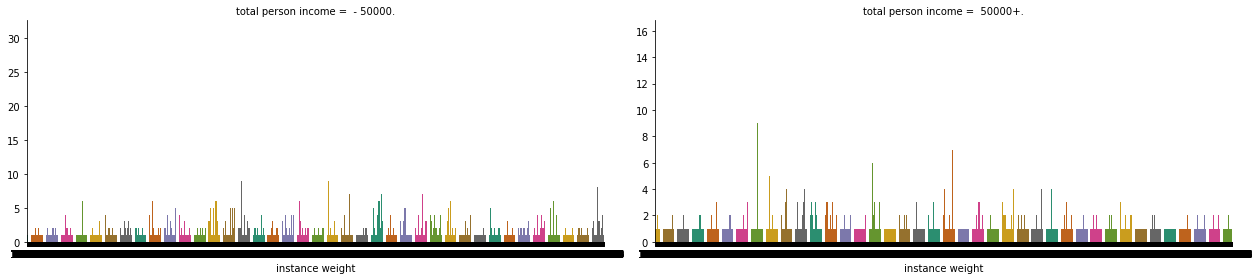

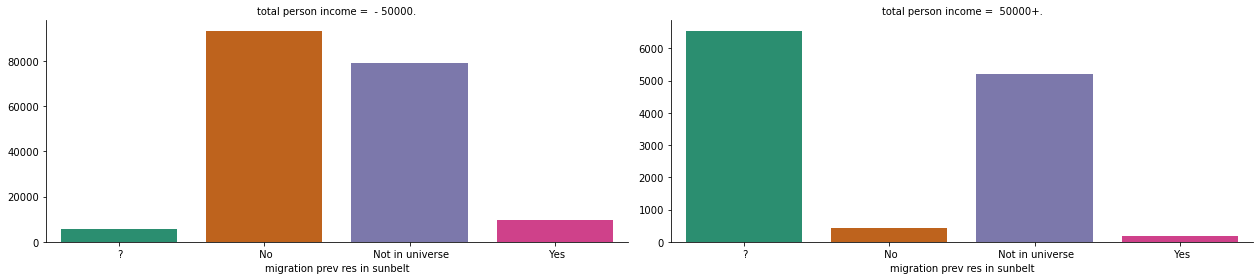

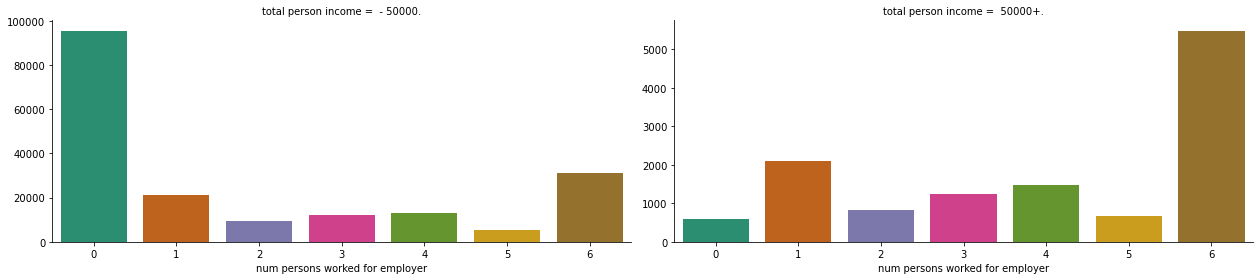

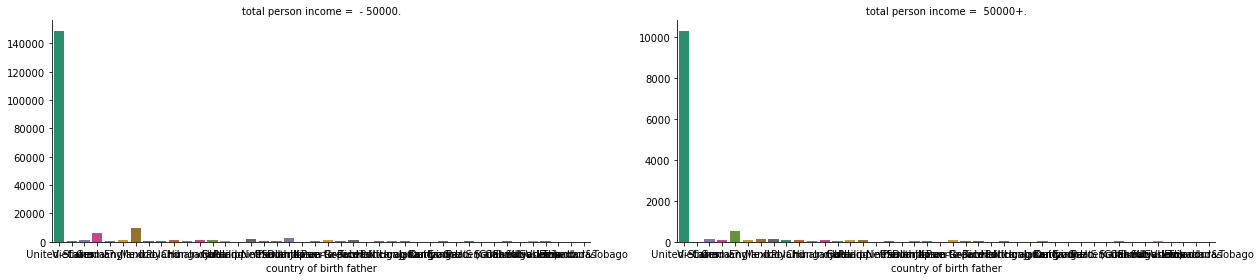

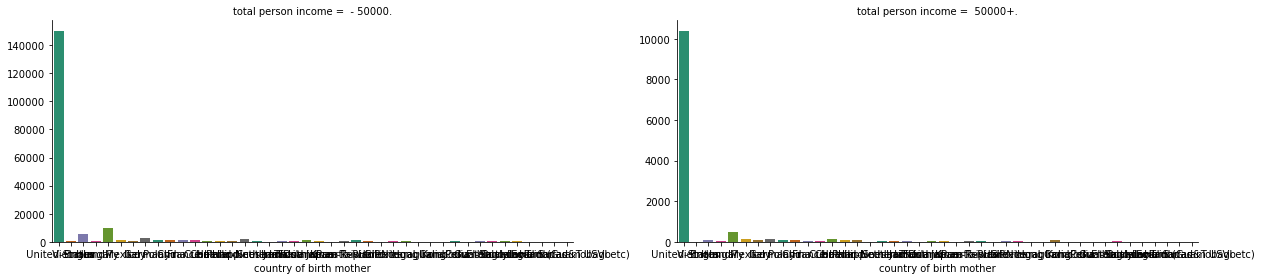

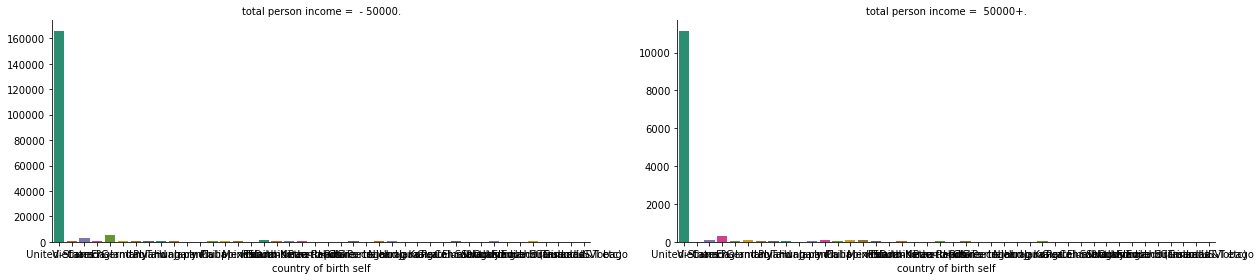

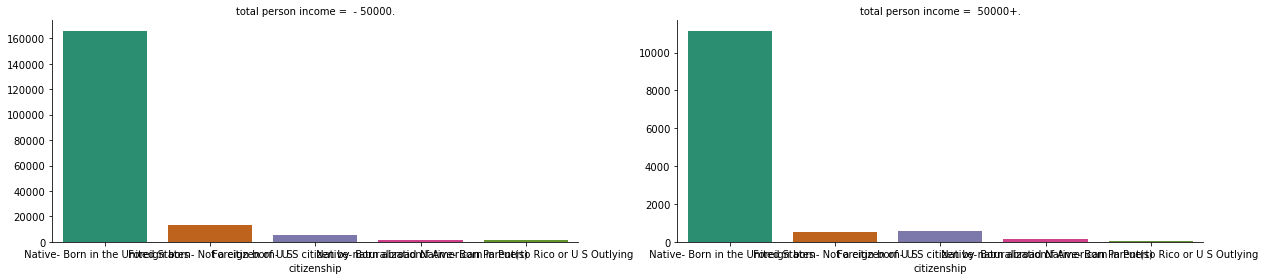

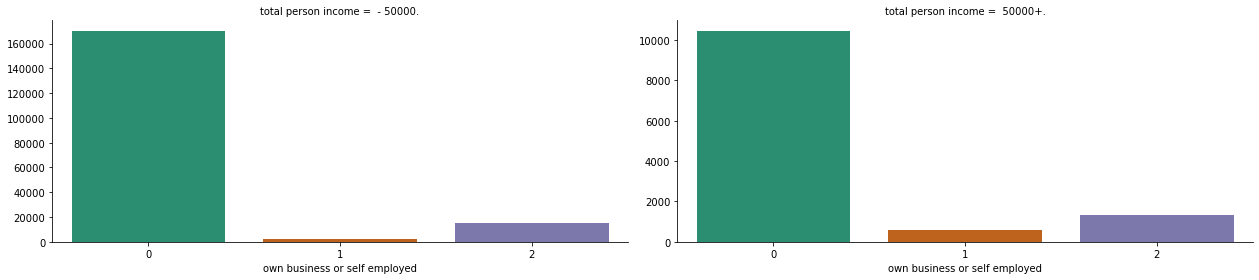

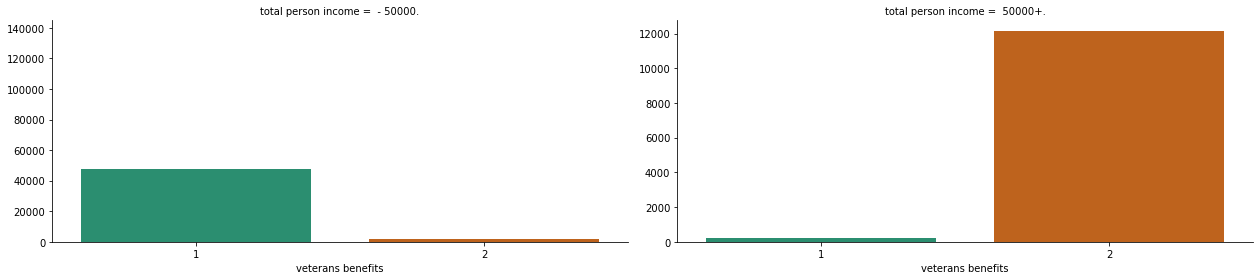

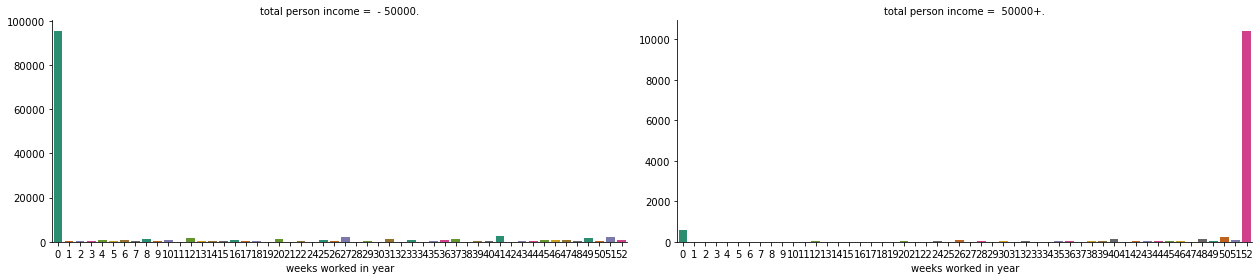

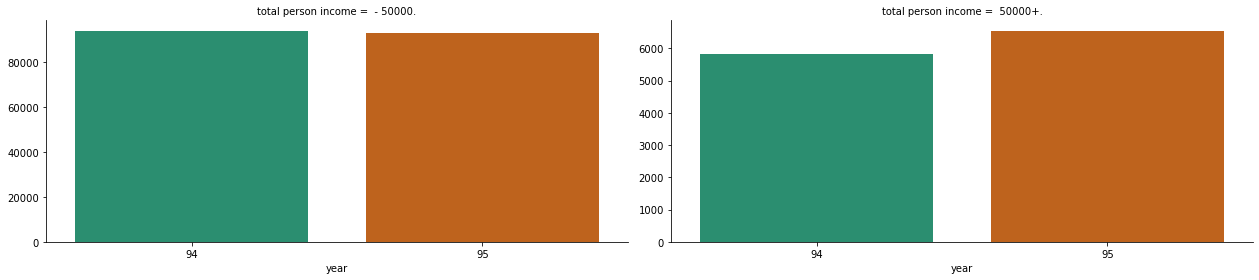

In [7]:
for col in df_train.drop('total person income', axis=1):
    g = sns.FacetGrid(df_train, col='total person income', size=4, aspect=2.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

#### Observations:
* The problem statement is binary classification and data is highly imbalanced with proportion 14.98 : 1
* Most cases are from married to civilian spouse present for +50k class
* Most cases are from married to civilian spouse present and never married  for -50k class
* Highest number of female from -50k $ are and male from +50k class
* There are some features with 70 % “Not in universe” category which have been dropped in analysis to avoid the imbalance these   features can cause and to have close to accurate prediction
* There are no null values and outliers present in the data
* The duplicate rows has been dropped from the data
* Wage per hour has varied data in the range of 0  to 10,000 
* 24.64 % of data are “High school graduate” and 22.59 % are “children”
* Dominating category in the “race” is “white”
* 1,60,000 people from -50k class own the business
* Most workers are from group of Self-employed-not incorporated for both the classes
* Most number of occupation code is 0 -50k class for and 2 for +50k class
* Most workers are from group of Full-time schedules for both the classes
* Singles are the highest numbers for tax filer for -50k and joint both under 65 are highest in +50k
* detailed household summary in household are having highest numbers for householders
* Highest number people for both the classes are native.
* Most number of weeks worked are 52
* Highest number of people are from United-States





# Encoding

In [8]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# fit and transform data
df_train = encoder.fit_transform(df_train)
print(df_train)

[[58.  6.  4. ... 52.  0.  0.]
 [18.  3.  0. ...  0.  1.  0.]
 [ 9.  3.  0. ...  0.  0.  0.]
 ...
 [47.  3.  0. ... 52.  1.  0.]
 [16.  3.  0. ...  0.  1.  0.]
 [32.  4. 42. ... 52.  0.  0.]]


In [11]:
# transform data
df_test = encoder.fit_transform(df_test)
print(df_test)

[[44.  6. 37. ... 26.  1.  0.]
 [ 2.  3.  0. ...  0.  1.  0.]
 [35.  4. 29. ... 52.  0.  0.]
 ...
 [24.  6.  1. ... 52.  0.  0.]
 [30.  4. 45. ... 52.  1.  0.]
 [67.  3.  0. ...  0.  0.  0.]]


# Splitting test and train data

In [ ]:
df_test

In [15]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
print(x_test.shape)
print(y_test.shape)

(99761, 30)
(99761,)


In [16]:
x_train =  df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
print(x_train.shape)
print(y_train.shape)

(199522, 30)
(199522,)


# Upsampling with SMOTE

In [14]:

# upsampling using smote
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", x_train.shape, y_train.shape)

Class= 0.0, n=183911 (93.69%)
Class= 1.0, n=12382 (6.31%)
Class= 0.0, n=183911 (50.00%)
Class= 1.0, n=183911 (50.00%)
Upsampled data shape:  (367822, 30) (367822,)


# Baseline modeling


In [10]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [11]:
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(x_train,y_train)
        y_pred=model_fit.predict(x_test)
        acc=accuracy_score(y_test,y_pred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [12]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [18]:
def bestParams(model,param,x_train,y_train):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    grid_cv=RandomizedSearchCV(estimator=model,param_distributions=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(x_train,y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [20]:
bestParams

<function __main__.bestParams(model, param, x_train, y_train)>

In [21]:
acc=modelAccuracy(models,x_test,y_test,1)

The Accuracy for  LogisticRegression  is : 0.8410667691498614
The Accuracy for  DecisionTreeClassifier  is : 0.9207204838285564
The Accuracy for  RandomForestClassifier  is : 0.950464208418455


In [22]:
bestModel(acc)

Best Model is  RandomForestClassifier  with accuaracy => 0.950464208418455


# Hyperparameter tuning

In [21]:
model=RandomForestClassifier()
param={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,param,x_train,y_train)

Best Parameters are  {'n_estimators': 200, 'criterion': 'gini'}
Best Accuracy is  0.949107346047972


In [24]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)

model.fit(x_train,y_train)
ypred=model.predict(x_test)

# Model performance evaluation

0.9487044640870568
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     92692
         1.0       0.62      0.46      0.53      6186

    accuracy                           0.95     98878
   macro avg       0.79      0.72      0.75     98878
weighted avg       0.94      0.95      0.95     98878



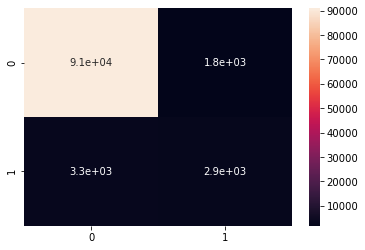

In [25]:
#Final Evaluation
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)

# Expalinable AI

In [35]:
lists=['age','class of worker','industry code','occupation code','education','wage per hour',
            'marital status','major industry code',
            'race','hispanic Origin','sex',
            'full or part time employment stat','capital gains','capital losses','divdends from stocks','tax filer status',
             'state of previous residence','detailed household and family stat',
            'detailed household summary in household','instance weight',
             'migration prev res in sunbelt','num persons worked for employer',
            'country of birth father','country of birth mother','country of birth self','citizenship',
            'own business or self employed','veterans benefits',
            'weeks worked in year','year','total person income']


In [36]:
df_train = pd.read_csv('df_train.csv',names=lists) #Read the dataset
df_test=pd.read_csv('df_test.csv',names=lists)

In [37]:
df_train

,age,class of worker,industry code,occupation code,education,wage per hour,marital status,major industry code,race,hispanic Origin,...,num persons worked for employer,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,year,total person income
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
1,58.0,6.0,4.0,34.0,16.0,0.0,0.0,4.0,4.0,0.0,...,1.0,40.0,40.0,40.0,4.0,0.0,2.0,52.0,0.0,0.0
2,18.0,3.0,0.0,0.0,0.0,0.0,4.0,14.0,1.0,0.0,...,0.0,41.0,41.0,41.0,0.0,0.0,2.0,0.0,1.0,0.0
3,9.0,3.0,0.0,0.0,10.0,0.0,4.0,14.0,4.0,0.0,...,0.0,40.0,40.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0
4,10.0,3.0,0.0,0.0,10.0,0.0,4.0,14.0,4.0,0.0,...,0.0,40.0,40.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196289,87.0,3.0,0.0,0.0,5.0,0.0,2.0,14.0,4.0,0.0,...,0.0,2.0,40.0,40.0,4.0,0.0,2.0,0.0,1.0,0.0
196290,65.0,5.0,37.0,2.0,1.0,0.0,2.0,2.0,4.0,0.0,...,1.0,40.0,40.0,40.0,4.0,0.0,2.0,52.0,0.0,0.0
196291,47.0,3.0,0.0,0.0,16.0,0.0,2.0,14.0,4.0,0.0,...,6.0,32.0,32.0,11.0,1.0,0.0,2.0,52.0,1.0,0.0
196292,16.0,3.0,0.0,0.0,0.0,0.0,4.0,14.0,4.0,0.0,...,0.0,40.0,40.0,40.0,4.0,0.0,2.0,0.0,1.0,0.0


In [38]:
with open(r"./RFC_MODEL.joblib","rb") as f:
    model = joblib.load(f)

In [39]:
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
print(x_train.shape)
print(y_train.shape)

(196294, 30)
(196294,)


In [40]:
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
print(x_test.shape)
print(y_test.shape)

(98879, 30)
(98879,)


In [111]:
!pip install shap==0.39.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Pooja\\anaconda3\\Lib\\site-packages\\~hap\\_cext.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\Pooja\anaconda3\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: shap
    Found existing installation: shap 0.40.0
    Uninstalling shap-0.40.0:
      Successfully uninstalled shap-0.40.0


In [9]:
shap.__version__

'0.39.0'

In [41]:
shap.initjs()

In [42]:
x_sample = x_train.sample(100)
x_sample

,age,class of worker,industry code,occupation code,education,wage per hour,marital status,major industry code,race,hispanic Origin,...,migration prev res in sunbelt,num persons worked for employer,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,year
73383,45.0,4.0,43.0,10.0,14.0,0.0,2.0,5.0,4.0,0.0,...,2.0,3.0,0.0,0.0,9.0,1.0,0.0,2.0,52.0,0.0
176757,36.0,7.0,43.0,9.0,14.0,0.0,3.0,5.0,1.0,0.0,...,0.0,6.0,36.0,36.0,36.0,0.0,0.0,2.0,52.0,1.0
151597,11.0,3.0,0.0,0.0,10.0,0.0,4.0,14.0,2.0,0.0,...,0.0,0.0,40.0,40.0,40.0,4.0,0.0,0.0,0.0,1.0
55949,27.0,0.0,50.0,36.0,16.0,0.0,4.0,18.0,4.0,0.0,...,2.0,3.0,40.0,40.0,40.0,4.0,0.0,2.0,52.0,0.0
50896,30.0,3.0,0.0,0.0,4.0,0.0,4.0,14.0,4.0,5.0,...,0.0,0.0,26.0,26.0,26.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33472,21.0,4.0,33.0,29.0,16.0,46.0,4.0,19.0,4.0,0.0,...,2.0,6.0,40.0,40.0,40.0,4.0,0.0,2.0,10.0,0.0
164303,23.0,4.0,9.0,37.0,12.0,273.0,2.0,10.0,4.0,0.0,...,0.0,6.0,40.0,40.0,40.0,4.0,2.0,2.0,52.0,1.0
118314,12.0,3.0,0.0,0.0,10.0,0.0,4.0,14.0,2.0,0.0,...,0.0,0.0,40.0,40.0,40.0,4.0,0.0,0.0,0.0,1.0
25925,35.0,4.0,33.0,29.0,7.0,0.0,0.0,19.0,4.0,0.0,...,1.0,2.0,40.0,40.0,40.0,4.0,2.0,2.0,52.0,0.0


In [12]:
shap_values = shap.TreeExplainer(model).shap_values(x_sample)

In [14]:
shap_values

[array([[-0.0221868 , -0.00189424,  0.12812385, ..., -0.00170522,
          0.12667105,  0.00885243],
        [-0.02031252,  0.01917335, -0.03031552, ..., -0.00238801,
         -0.02942847,  0.05723258],
        [-0.0219799 , -0.01363879,  0.08257059, ..., -0.0020511 ,
          0.08513321,  0.01130077],
        ...,
        [-0.00127714,  0.02241274, -0.00814927, ..., -0.0016962 ,
         -0.01729407,  0.0092724 ],
        [ 0.12464137,  0.00817889, -0.01537133, ..., -0.00179195,
         -0.01599379,  0.01991867],
        [ 0.11868608,  0.01096199, -0.00709041, ..., -0.00129554,
          0.09006598,  0.01049784]]),
 array([[ 0.0221868 ,  0.00189424, -0.12812385, ...,  0.00170522,
         -0.12667105, -0.00885243],
        [ 0.02031252, -0.01917335,  0.03031552, ...,  0.00238801,
          0.02942847, -0.05723258],
        [ 0.0219799 ,  0.01363879, -0.08257059, ...,  0.0020511 ,
         -0.08513321, -0.01130077],
        ...,
        [ 0.00127714, -0.02241274,  0.00814927, ...,  

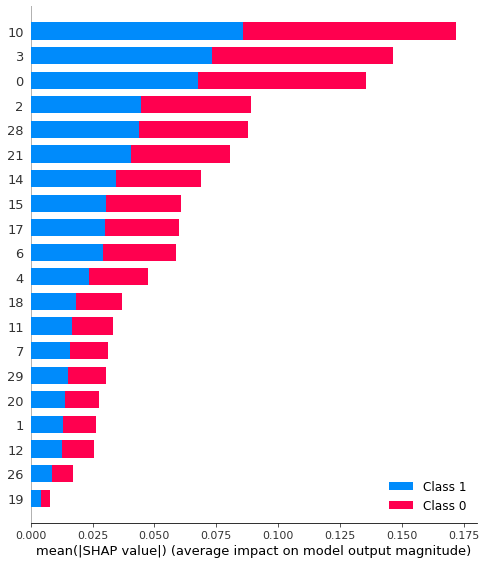

In [15]:
shap.summary_plot(shap_values, x_sample, plot_type="bar")

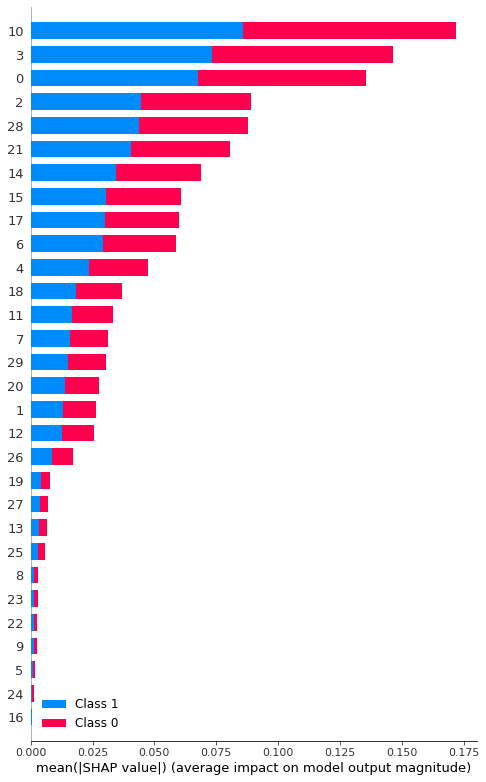

In [16]:
shap.summary_plot(shap_values, x_sample, max_display=30)

In [17]:
shap.force_plot(shap.TreeExplainer(model).expected_value[0],
                shap_values[0][:], 
                x_sample)

In [19]:
ypred=model.predict(x_test)
print(ypred[50])
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[1][50], x_sample.iloc[50])

0.0


In [20]:
i=9
print(ypred[i])
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0][i], x_sample.values[i], feature_names = x_sample.columns)

0.0


In [101]:
shap.TreeExplainer(model).expected_value[0]

0.49996600257733387

In [104]:
shap_values[0][0]

array([-1.66080485e-02, -1.33803971e-02,  8.28406175e-02,  7.71318047e-02,
        3.21569450e-02, -1.97237267e-04,  2.21888878e-04, -4.95585008e-03,
       -5.09521324e-04, -3.01052707e-04,  1.06379045e-01, -1.76245450e-04,
        7.50569670e-03,  1.60249252e-03,  2.27492277e-02, -1.91956919e-02,
        7.45798793e-05,  3.67513989e-02,  2.66910788e-02,  1.89071972e-03,
        1.12073076e-02,  5.91840258e-02,  8.19878121e-04,  6.81865708e-04,
        2.16032664e-04, -4.36322203e-04,  9.80121183e-04, -1.78141754e-03,
        8.28213741e-02,  5.66968103e-03])

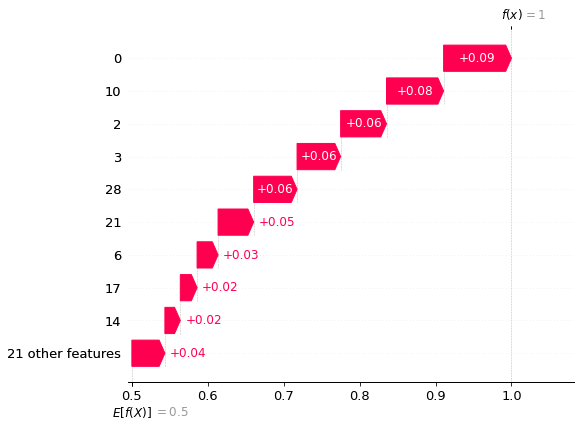

In [21]:
row = 10
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(model).expected_value[0], 
                                       shap_values[0][row],
                                       feature_names=x_sample.columns.tolist()
                                      )

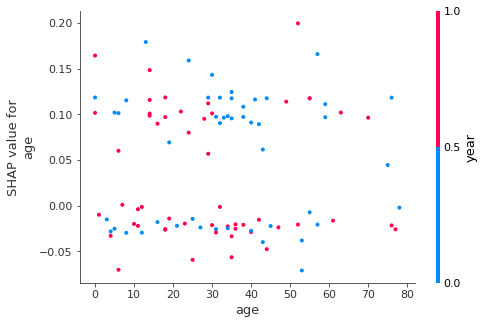

In [43]:
shap.dependence_plot('age', shap_values[0], x_sample)

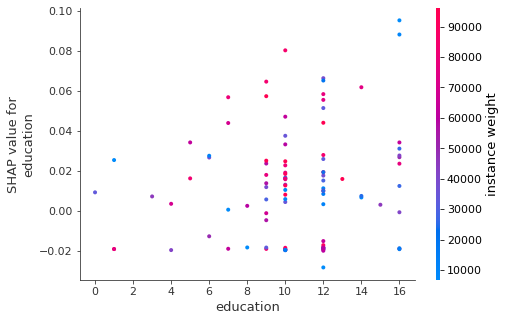

In [44]:
shap.dependence_plot('education', shap_values[0], x_sample)

0.0


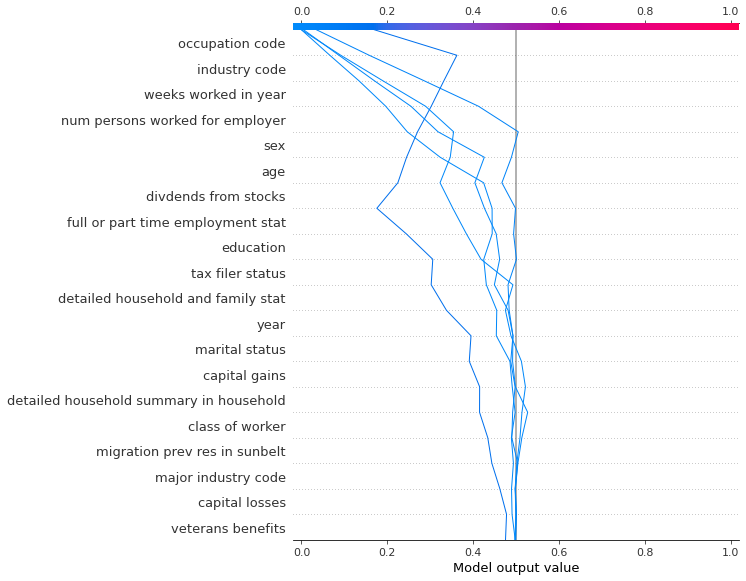

In [45]:
print(ypred[5])
shap.decision_plot(shap.TreeExplainer(model).expected_value[0], 
                   shap_values[1][:5], 
                   feature_names=x_sample.columns.tolist())

In [113]:
import joblib
with open(r"./RFC_MODEL.joblib", "wb") as f:
    joblib.dump(model, f, compress=3)
    


In [114]:
df_train.to_csv(r"./df_train.csv", index=False)
df_test.to_csv(r"./df_test.csv", index=False)